In [39]:
import json
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
gg_total = 7
om_total = 13


In [41]:
# code to read in and parse data

all_data = {}

ggp_file = '/content/drive/MyDrive/IW-F24/11-11-data/ggp_ips.json'
ggf_file = '/content/drive/MyDrive/IW-F24/11-11-data/ggf_ips.json'
om_file = '/content/drive/MyDrive/IW-F24/11-11-data/om_ips.json'

with open(ggp_file, 'r') as file:
    ggp_data = json.load(file)
with open(ggf_file, 'r') as file:
    ggf_data = json.load(file)
with open(om_file, 'r') as file:
    om_data = json.load(file)

num_nodes = len(ggf_data)
cdf_x = np.arange(1, num_nodes + 1) / num_nodes
cdf_x[0] = 0

print(num_nodes)



32


In [42]:
# create cdf of domain resilience for ggp setup
ggp_ips = set()
vote_counts = {vote: 0 for vote in range(8)}
ggp_analyzed = {quorum: [] for quorum in range(1, 8)}

for victim in ggp_data:
  node_res = 0
  all_quorums = {quorum: 0 for quorum in range(1,gg_total+1)}
  for adversary in ggp_data[victim]:
    count = len(ggp_data[victim][adversary])
    vote_counts[count] += 1
    for quorum in range(1, gg_total+1):
      if(count > gg_total - quorum):
        all_quorums[quorum] += 1
    # update list of ips
    for ip in ggp_data[victim][adversary]:
      ggp_ips.add(ip)
  all_quorums = {key: np.round(value / (num_nodes -1), 3) for key, value in all_quorums.items()}
  for quorum in range(1, gg_total+1):
    ggp_analyzed[quorum].append(all_quorums[quorum])



GTS Premium Tier: average resilience under various quorums
quorum of 1: 0.28
quorum of 2: 0.324
quorum of 3: 0.452
quorum of 4: 0.5
quorum of 5: 0.548
quorum of 6: 0.676
quorum of 7: 0.72

GTS Premium Tier: median resilience under various quorums
quorum of 1: 0.323
quorum of 2: 0.387
quorum of 3: 0.419
quorum of 4: 0.484
quorum of 5: 0.548
quorum of 6: 0.839
quorum of 7: 0.871


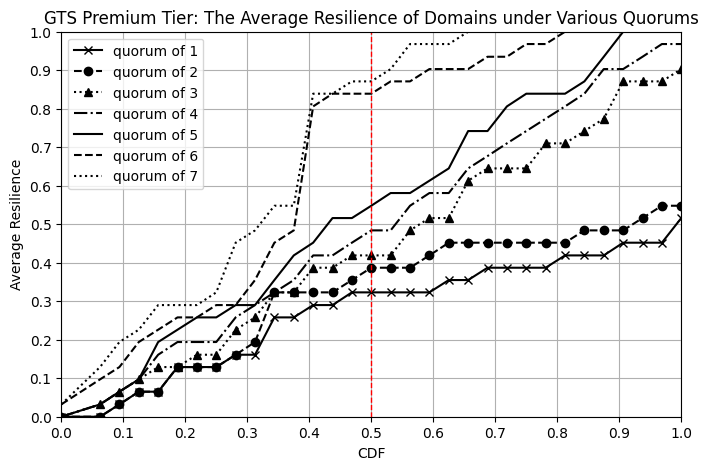

In [43]:

# compute averages
ggp_avg = {quorum: 0 for quorum in range(1,gg_total+1)}
print("GTS Premium Tier: average resilience under various quorums")
for quorum in range(1, gg_total+1):
  ggp_analyzed[quorum] = np.sort(ggp_analyzed[quorum])
  ggp_avg[quorum] = np.round(sum(ggp_analyzed[quorum]) / num_nodes, 3)
  print("quorum of " + str(quorum) +": " + str(ggp_avg[quorum]))

print()
# compute medians
med_index = int(num_nodes/2 - 1)
print("GTS Premium Tier: median resilience under various quorums")
for quorum in range(1, gg_total+1):
  print("quorum of " + str(quorum) +": " + str(ggp_analyzed[quorum][med_index]))

# create cdfs

line_styles = ['-', '--', ':', '-.', '-', '--', ':']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
markers = ['x', 'o', '^', 'None', 'None', 'None', 'None']

plt.figure(figsize=(8, 5))


for quorum in range(1, gg_total+1):
  plt.plot(cdf_x, ggp_analyzed[quorum], label=f'quorum of {quorum}', color='black', linestyle=line_styles[quorum-1], marker=markers[quorum-1])

plt.title("GTS Premium Tier: The Average Resilience of Domains under Various Quorums")
plt.ylabel('Average Resilience')
plt.xlabel('CDF')
plt.grid(True)

plt.legend()

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

56.048387096774185


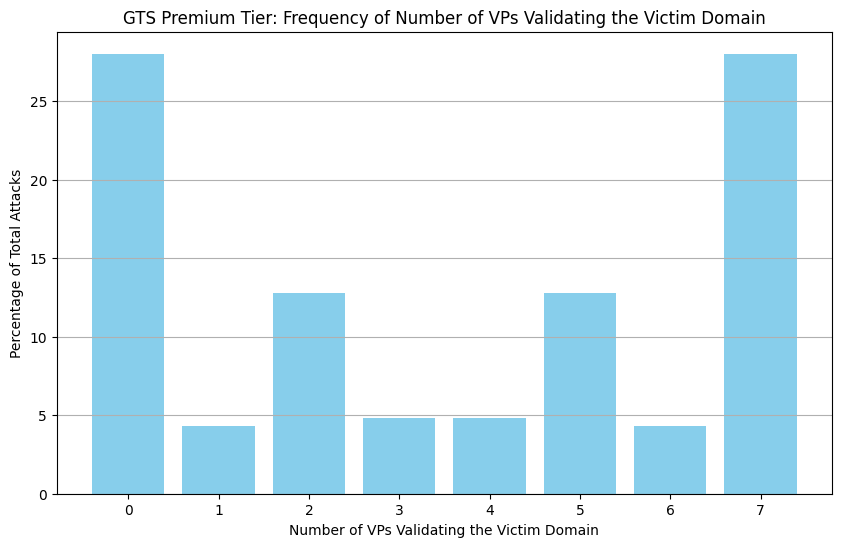

In [44]:
# bar chart ggp

total = sum(vote_counts.values())
percent_data = {key: (value / total) * 100 for key, value in vote_counts.items()}
vote_same = percent_data[0] + percent_data[7]
print(vote_same)

x_values = list(percent_data.keys())
y_values = list(percent_data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Number of VPs Validating the Victim Domain')
plt.ylabel('Percentage of Total Attacks')
plt.title('GTS Premium Tier: Frequency of Number of VPs Validating the Victim Domain')
plt.xticks(x_values)
plt.grid(axis='y')

# Show the plot
plt.show()

In [45]:
# create cdf of domain resilience for ggf setup
ggf_ips = set()
vote_counts = {vote: 0 for vote in range(gg_total+1)}
ggf_analyzed = {quorum: [] for quorum in range(1, gg_total+1)}

for victim in ggf_data:
  node_res = 0
  all_quorums = {quorum: 0 for quorum in range(1,8)}
  for adversary in ggf_data[victim]:
    count = len(ggf_data[victim][adversary])
    vote_counts[count] += 1
    for quorum in range(1, gg_total+1):
      if(count > gg_total - quorum):
        all_quorums[quorum] += 1
    # update list of ips
    for ip in ggf_data[victim][adversary]:
      ggf_ips.add(ip)
  all_quorums = {key: np.round(value / (num_nodes -1), 3) for key, value in all_quorums.items()}
  for quorum in range(1, gg_total+1):
    ggf_analyzed[quorum].append(all_quorums[quorum])



GTS Standard Tier: average resilience under various quorums
quorum of 1: 0.304
quorum of 2: 0.328
quorum of 3: 0.458
quorum of 4: 0.5
quorum of 5: 0.542
quorum of 6: 0.672
quorum of 7: 0.697

GTS Standard Tier: median resilience under various quorums
quorum of 1: 0.387
quorum of 2: 0.387
quorum of 3: 0.419
quorum of 4: 0.484
quorum of 5: 0.516
quorum of 6: 0.839
quorum of 7: 0.871


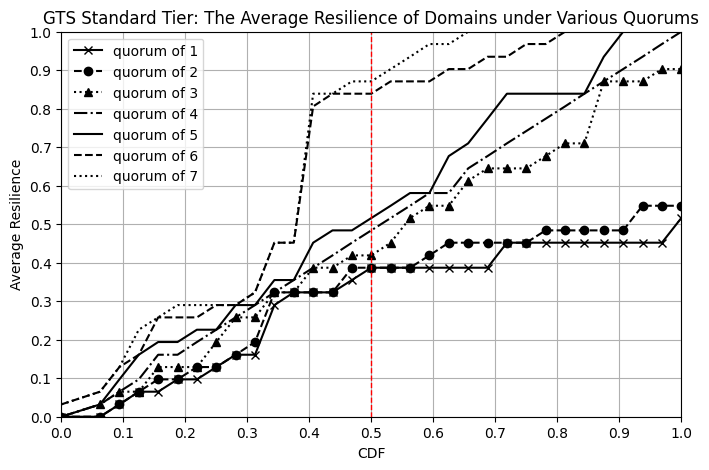

In [46]:

# compute averages
ggf_avg = {quorum: 0 for quorum in range(1,gg_total+1)}
print("GTS Standard Tier: average resilience under various quorums")
for quorum in range(1, gg_total+1):
  ggf_analyzed[quorum] = np.sort(ggf_analyzed[quorum])
  ggf_avg[quorum] = np.round(sum(ggf_analyzed[quorum]) / num_nodes, 3)
  print("quorum of " + str(quorum) +": " + str(ggf_avg[quorum]))

print()
# compute medians
med_index = int(num_nodes/2 - 1)
print("GTS Standard Tier: median resilience under various quorums")
for quorum in range(1, gg_total+1):
  print("quorum of " + str(quorum) +": " + str(ggf_analyzed[quorum][med_index]))

# create cdfs
line_styles = ['-', '--', ':', '-.', '-', '--', ':']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
markers = ['x', 'o', '^', 'None', 'None', 'None', 'None']

plt.figure(figsize=(8, 5))


for quorum in range(1, gg_total+1):
  plt.plot(cdf_x, ggf_analyzed[quorum], label=f'quorum of {quorum}', color='black', linestyle=line_styles[quorum-1], marker=markers[quorum-1])

plt.title("GTS Standard Tier: The Average Resilience of Domains under Various Quorums")
plt.ylabel('Average Resilience')
plt.xlabel('CDF')
plt.grid(True)

plt.legend()

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

60.68548387096774


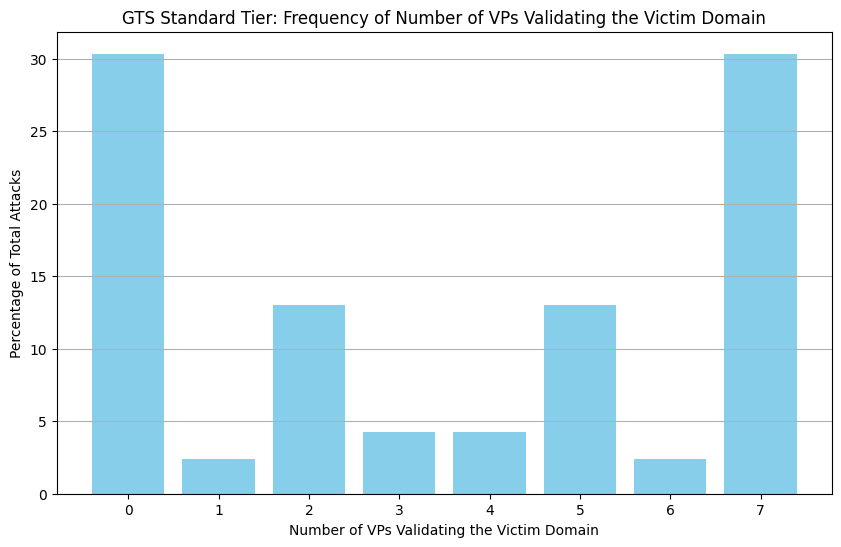

In [47]:
# bar chart ggf

total = sum(vote_counts.values())
percent_data = {key: (value / total) * 100 for key, value in vote_counts.items()}
vote_same = percent_data[0] + percent_data[7]
print(vote_same)

x_values = list(percent_data.keys())
y_values = list(percent_data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Number of VPs Validating the Victim Domain')
plt.ylabel('Percentage of Total Attacks')
plt.title('GTS Standard Tier: Frequency of Number of VPs Validating the Victim Domain')
plt.xticks(x_values)
plt.grid(axis='y')

# Show the plot
plt.show()

In [48]:
# create cdf of domain resilience for om setup
om_ips = set()
vote_counts = {vote: 0 for vote in range(om_total+1)}
om_analyzed = {quorum: [] for quorum in range(1, om_total+1)}

for victim in om_data:
  node_res = 0
  all_quorums = {quorum: 0 for quorum in range(1,om_total+1)}
  for adversary in om_data[victim]:
    count = len(om_data[victim][adversary])
    vote_counts[count] += 1
    for quorum in range(1, om_total+1):
      if(count > om_total - quorum):
        all_quorums[quorum] += 1
    # update list of ips
    for ip in om_data[victim][adversary]:
      om_ips.add(ip)
  all_quorums = {key: np.round(value / (num_nodes -1), 3) for key, value in all_quorums.items()}
  for quorum in range(1, om_total+1):
    om_analyzed[quorum].append(all_quorums[quorum])



Open-MPIC: average resilience under various quorums
quorum of 1: 0.039
quorum of 2: 0.079
quorum of 3: 0.094
quorum of 4: 0.117
quorum of 5: 0.204
quorum of 6: 0.409
quorum of 7: 0.5
quorum of 8: 0.591
quorum of 9: 0.796
quorum of 10: 0.883
quorum of 11: 0.906
quorum of 12: 0.921
quorum of 13: 0.961

Open-MPIC: median resilience under various quorums
quorum of 1: 0.032
quorum of 2: 0.065
quorum of 3: 0.065
quorum of 4: 0.097
quorum of 5: 0.161
quorum of 6: 0.323
quorum of 7: 0.452
quorum of 8: 0.613
quorum of 9: 0.839
quorum of 10: 0.968
quorum of 11: 0.968
quorum of 12: 0.968
quorum of 13: 1.0


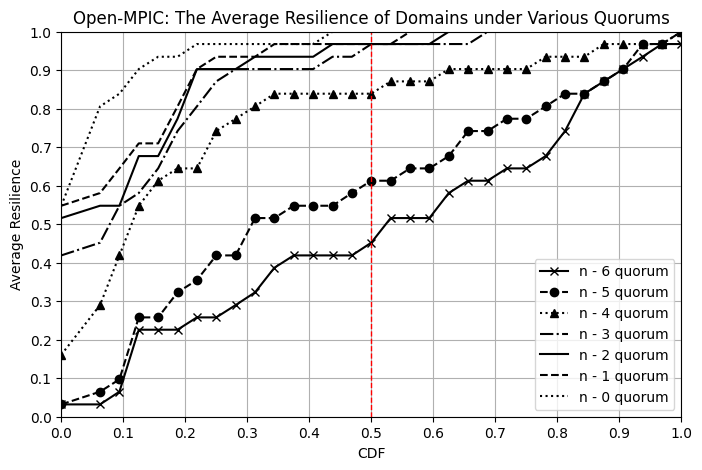

In [49]:

# compute averages
om_avg = {quorum: 0 for quorum in range(1,om_total+1)}
print("Open-MPIC: average resilience under various quorums")
for quorum in range(1, om_total+1):
  om_analyzed[quorum] = np.sort(om_analyzed[quorum])
  om_avg[quorum] = np.round(sum(om_analyzed[quorum]) / num_nodes, 3)
  print("quorum of " + str(quorum) +": " + str(om_avg[quorum]))

print()
# compute medians
med_index = int(num_nodes/2 - 1)
print("Open-MPIC: median resilience under various quorums")
for quorum in range(1, om_total+1):
  print("quorum of " + str(quorum) +": " + str(om_analyzed[quorum][med_index]))

# create cdfs

line_styles = ['-', '--', ':', '-.', '-', '--', ':']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
markers = ['x', 'o', '^', 'None', 'None', 'None', 'None']

plt.figure(figsize=(8, 5))


for quorum in range(7, om_total+1):
  plt.plot(cdf_x, om_analyzed[quorum], label=f'n - {13 - quorum} quorum', color='black', linestyle=line_styles[quorum-7], marker=markers[quorum-7])


plt.title("Open-MPIC: The Average Resilience of Domains under Various Quorums")
plt.ylabel('Average Resilience')
plt.xlabel('CDF')
plt.grid(True)

plt.legend()

# add vertical lines at certain percentile
#plt.axvline(x=0.1, color='red', linestyle='--', linewidth=1)
plt.axvline(x=0.5, color='red', linestyle='--', linewidth=1)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.show()

13.004032258064516


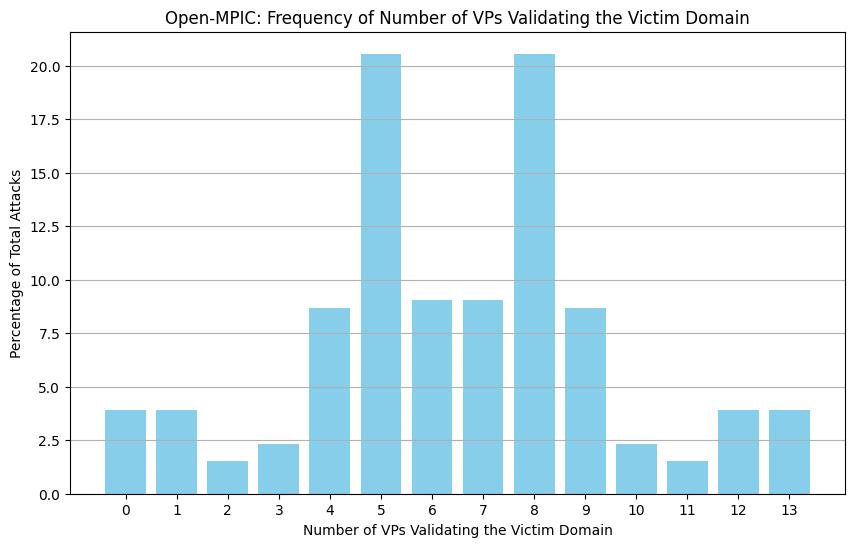

In [50]:
# bar chart om

total = sum(vote_counts.values())
percent_data = {key: (value / total) * 100 for key, value in vote_counts.items()}
vote_same = percent_data[0] + percent_data[7]
print(vote_same)

x_values = list(percent_data.keys())
y_values = list(percent_data.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(x_values, y_values, color='skyblue')
plt.xlabel('Number of VPs Validating the Victim Domain')
plt.ylabel('Percentage of Total Attacks')
plt.title('Open-MPIC: Frequency of Number of VPs Validating the Victim Domain')
plt.xticks(x_values)
plt.grid(axis='y')

# Show the plot
plt.show()

In [51]:
# dictionary of ips and their location

geo_dict = {
    "35.211.239.179": "us-east",
    "35.209.87.57" : "us-central",
    "35.212.128.228": "us-west",
    "35.210.226.98": "europe-west",
    "35.217.9.53": "europe-north",
    "35.206.237.180": "asia-east",
    "35.213.170.66" : "asia-southeast",
    "34.75.246.52": "us-east",
    "34.171.228.132": "us-central",
    "34.83.63.223": "us-west",
    "34.140.35.230": "europe-west",
    "34.88.225.17": "europe-north",
    "35.221.197.15": "asia-east",
    "35.185.188.182" : "asia-southeast"
}

In [52]:
# create pairwise matrix of le vantage points to analyze similar routing behaviors
from itertools import combinations

ip_index = {ip: i for i, ip in enumerate(ggp_ips)}
num_ips = len(ip_index)
matrix = np.zeros((num_ips, num_ips), dtype=int)

for victim in ggp_data:
  for adversary in ggp_data[victim]:
      # count pairs of ips that routed to victim
      victim_indices = [ip_index[ip] for ip in ggp_data[victim][adversary]]
      for i, j in combinations(victim_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

    # count pairs of ips that routed to adversary
      attacker_indices = [ip for ip in range(num_ips) if ip not in victim_indices]
      for i, j in combinations(attacker_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

print("GTS Premium Tier: Pairwise Similarity Matrix for VP Locations")
location_index = {geo_dict[ip]: i for i, ip in enumerate(ggp_ips)}
print(location_index)
matrix = np.round(matrix.astype(float) / ((num_nodes) * (num_nodes - 1)), 2)
print(matrix)




GTS Premium Tier: Pairwise Similarity Matrix for VP Locations
{'europe-north': 0, 'us-east': 1, 'us-central': 2, 'europe-west': 3, 'asia-southeast': 4, 'us-west': 5, 'asia-east': 6}
[[0.   0.76 0.75 0.96 0.65 0.75 0.65]
 [0.76 0.   0.9  0.79 0.77 0.9  0.77]
 [0.75 0.9  0.   0.79 0.79 0.92 0.79]
 [0.96 0.79 0.79 0.   0.68 0.79 0.68]
 [0.65 0.77 0.79 0.68 0.   0.84 1.  ]
 [0.75 0.9  0.92 0.79 0.84 0.   0.84]
 [0.65 0.77 0.79 0.68 1.   0.84 0.  ]]


In [53]:

ip_index = {ip: i for i, ip in enumerate(ggf_ips)}
num_ips = len(ip_index)
matrix = np.zeros((num_ips, num_ips), dtype=int)

for victim in ggf_data:
  for adversary in ggf_data[victim]:
      # count pairs of ips that routed to victim
      victim_indices = [ip_index[ip] for ip in ggf_data[victim][adversary]]
      for i, j in combinations(victim_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

    # count pairs of ips that routed to adversary
      attacker_indices = [ip for ip in range(num_ips) if ip not in victim_indices]
      for i, j in combinations(attacker_indices, 2):
        matrix[i][j] += 1
        matrix[j][i] += 1

print("GTS Standard Tier: Pairwise Similarity Matrix for VP Locations")
location_index = {geo_dict[ip]: i for i, ip in enumerate(ggp_ips)}
print(location_index)
matrix = np.round(matrix.astype(float) / ((num_nodes) * (num_nodes - 1)), 2)
print(matrix)

GTS Standard Tier: Pairwise Similarity Matrix for VP Locations
{'europe-north': 0, 'us-east': 1, 'us-central': 2, 'europe-west': 3, 'asia-southeast': 4, 'us-west': 5, 'asia-east': 6}
[[0.   0.8  1.   0.65 0.84 0.68 0.79]
 [0.8  0.   0.8  0.79 0.95 0.82 0.98]
 [1.   0.8  0.   0.65 0.84 0.68 0.79]
 [0.65 0.79 0.65 0.   0.74 0.96 0.79]
 [0.84 0.95 0.84 0.74 0.   0.78 0.93]
 [0.68 0.82 0.68 0.96 0.78 0.   0.83]
 [0.79 0.98 0.79 0.79 0.93 0.83 0.  ]]
